<H2>Bereinigung der Datenbanken</H2>

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import ast
from sklearn.cluster import KMeans
import numpy as np
import altair as alt

In [9]:
# CSV Laden
try:
    df1 = pd.read_csv('tmdb_5000_movies.csv')
    
    # NaN entfernen 
    df1_cleaned = df1.dropna()
    
    # Cleaned DF1 Speichern
    df1_cleaned.to_csv('tmdb_5000_movies_cleaned.csv', index=False)
    
    print("Die Datei wurde bereinigt und als 'tmdb_5000_movies_cleaned.csv' gespeichert.")
    
    # Zeige die ersten 5 Zeilen des ursprünglichen DataFrames an
    print(df1.head())
    
    # Zeige den Index des ursprünglichen DataFrames an
    print(df1.index)
except FileNotFoundError:
    print("Die Datei 'tmdb_5000_movies.csv' wurde nicht gefunden. Bitte stelle sicher, dass sie im richtigen Verzeichnis liegt.")


Die Datei wurde bereinigt und als 'tmdb_5000_movies_cleaned.csv' gespeichert.
      budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3  250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4  260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                       homepage  movie_id  \
0                   http://www.avatarmovie.com/     19995   
1  http://disney.go.com/disneypictures/pirates/       285   
2   http://www.sonypictures.com/movies/spectre/    206647   
3            http://www.thedarkknightrises.com/     49026   
4          http://movies.disney.com/john-carter     49529   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [

In [10]:
# CSV Laden
try:
    df2 = pd.read_csv('tmdb_5000_credits.csv')
    
    # NaN entfernen 
    df2_cleaned = df2.dropna()
    
    # Cleaned DF2 Speichern
    df2_cleaned.to_csv('tmdb_5000_credits_cleaned.csv', index=False)
    
    print("Die Datei wurde bereinigt und als 'tmdb_5000_credits_cleaned.csv' gespeichert.")
    
    # Zeige die ersten 5 Zeilen des ursprünglichen DataFrames an
    print(df2.head())
    
    # Zeige den Index des ursprünglichen DataFrames an
    print(df2.index)
except FileNotFoundError:
    print("Die Datei 'tmdb_5000_credits.csv' wurde nicht gefunden. Bitte stelle sicher, dass sie im richtigen Verzeichnis liegt.")


Die Datei wurde bereinigt und als 'tmdb_5000_credits_cleaned.csv' gespeichert.
   movie_id                                     title  \
0     19995                                    Avatar   
1       285  Pirates of the Caribbean: At World's End   
2    206647                                   Spectre   
3     49026                     The Dark Knight Rises   
4     49529                               John Carter   

                                                cast  \
0  [{"cast_id": 242, "character": "Jake Sully", "...   
1  [{"cast_id": 4, "character": "Captain Jack Spa...   
2  [{"cast_id": 1, "character": "James Bond", "cr...   
3  [{"cast_id": 2, "character": "Bruce Wayne / Ba...   
4  [{"cast_id": 5, "character": "John Carter", "c...   

                                                crew  
0  [{"credit_id": "52fe48009251416c750aca23", "de...  
1  [{"credit_id": "52fe4232c3a36847f800b579", "de...  
2  [{"credit_id": "54805967c3a36829b5002c41", "de...  
3  [{"credit_id": "52

In [15]:
print(df1_cleaned.columns)
print(df2_cleaned.columns)

Index(['budget', 'genres', 'homepage', 'movie_id', 'keywords',
       'original_language', 'original_title', 'overview', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'vote_average', 'vote_count'],
      dtype='object')
Index(['movie_id', 'title', 'cast', 'crew'], dtype='object')


<H1>Balkendiagram Top Ten Movies</H1>

In [17]:
# Lese die CSV-Datei in einen Pandas DataFrame ein
df = pd.read_csv('combined_tmdb_movies_credits.csv')

# Gruppiere die Daten nach Filmtitel und berechne die durchschnittliche Beliebtheit
df_agg = df.groupby('original_title')['popularity'].mean().reset_index()

# Sortiere die Daten nach Beliebtheit und wähle die Top 10 aus
df_top_10 = df_agg.sort_values(by='popularity', ascending=False).head(10)

# Erstelle das Balkendiagramm
chart = alt.Chart(df_top_10).mark_bar().encode(
    x=alt.X('original_title', title='Filmtitel', axis=alt.Axis(labelAngle=-45)),
    y=alt.Y('popularity', title='Beliebtheit'),
    tooltip=['original_title', 'popularity']
).properties(
    title='Top 10 der beliebtesten Filme',
    width=800  # Setze die Breite des Diagramms auf 800 Pixel
).interactive()

# Speichere das Diagramm in einer JSON-Datei
chart.save('top_10_movies_barchart.json')

# Zeige das Diagramm an
chart.show()

print("Das Balkendiagramm wurde als 'top_10_movies_barchart.json' gespeichert und angezeigt.")

alt.Chart(...)

Das Balkendiagramm wurde als 'top_10_movies_barchart.json' gespeichert und angezeigt.


<H1>Kleine Statistische Auswertung</H1>

In [18]:
# Lade CSV
try:
    df_movies = pd.read_csv('tmdb_5000_movies.csv')
    
    # Zeige die ersten 5 Zeilen und alle Spalten an
    print(df_movies.head().to_markdown(index=False, numalign="left", stralign="left"))
    
    # Zeige die Spalten und ihre Typen an
    print(df_movies.info())
    
    # Berechne Statistiken
    print(df_movies.describe().to_markdown(numalign="left", stralign="left"))
    
    # Zähle eindeutige Werte für nicht-numerische Spalten.
    for col in df_movies.select_dtypes(include=['object']):
        print(f'\n{col}: {df_movies[col].nunique()}')
except FileNotFoundError:
    print("Die Datei 'tmdb_5000_movies.csv' wurde nicht gefunden. Bitte stelle sicher, dass sie im richtigen Verzeichnis liegt.")


| budget    | genres                                                                                                                                 | homepage                                     | movie_id   | keywords                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    | original_language   | o

<H1>Top Ten Produktionsfirmen nach Anzahl der Filme</H1>

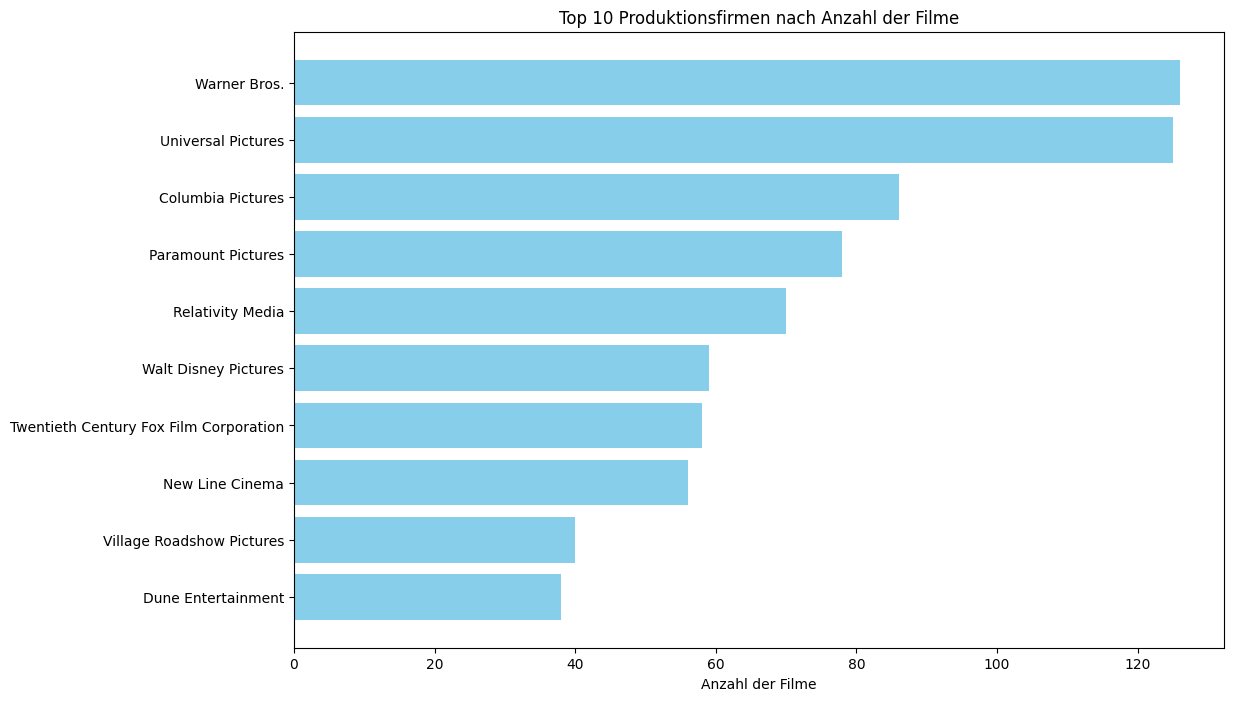

In [19]:
# Produktionsfirmen extrahieren und zählen
production_counts = Counter()

# Durchlaufen der Zeilen und Produktionsfirmen zählen
for companies in df['production_companies'].dropna():
    try:
        # Umwandlung des Strings in eine Liste von Dictionaries
        companies_list = ast.literal_eval(companies)
        for company in companies_list:
            production_counts[company['name']] += 1
    except (ValueError, SyntaxError, TypeError):
        continue

# Top-10-Produktionsfirmen extrahieren
top_10_productions = production_counts.most_common(10)
top_10_names, top_10_counts = zip(*top_10_productions)

# Balkendiagramm erstellen
plt.figure(figsize=(12, 8))
plt.barh(top_10_names, top_10_counts, color='skyblue')
plt.xlabel('Anzahl der Filme')
plt.title('Top 10 Produktionsfirmen nach Anzahl der Filme')
plt.gca().invert_yaxis()  # Invertiere die y-Achse für absteigende Reihenfolge
plt.show()



<H1>Beiden Datensätze Kombinieren</H1>

In [20]:
# Dateien laden
movies_df = pd.read_csv('tmdb_5000_movies_cleaned.csv')
credits_df = pd.read_csv('tmdb_5000_credits_cleaned.csv')

# Beide DF Überblick
movies_df.head(), credits_df.head()


(      budget                                             genres  \
 0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
 1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
 2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
 3  250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
 4  260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
 
                                        homepage  movie_id  \
 0                   http://www.avatarmovie.com/     19995   
 1  http://disney.go.com/disneypictures/pirates/       285   
 2   http://www.sonypictures.com/movies/spectre/    206647   
 3            http://www.thedarkknightrises.com/     49026   
 4          http://movies.disney.com/john-carter     49529   
 
                                             keywords original_language  \
 0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
 1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...             

In [21]:
# Die DFs anhand der 'movie_id' Spalte zusammenführen
combined_df = pd.merge(movies_df, credits_df, on='movie_id', suffixes=('_movies', '_credits'))

# Vorschau der kombinierten DF
combined_df.head()


,budget,genres,homepage,movie_id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title_movies,vote_average,vote_count,title_credits,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [22]:
# Erneute Info DF Combined
combined_info = combined_df.info()

# Fehlende Werte in jedem Feld
missing_values = combined_df.isnull().sum()

# Grundlegende statistische Übersicht (numerische Daten)
stats_summary = combined_df.describe()

combined_info, missing_values, stats_summary


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1493 entries, 0 to 1492
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                1493 non-null   int64  
 1   genres                1493 non-null   object 
 2   homepage              1493 non-null   object 
 3   movie_id              1493 non-null   int64  
 4   keywords              1493 non-null   object 
 5   original_language     1493 non-null   object 
 6   original_title        1493 non-null   object 
 7   overview              1493 non-null   object 
 8   popularity            1493 non-null   float64
 9   production_companies  1493 non-null   object 
 10  production_countries  1493 non-null   object 
 11  release_date          1493 non-null   object 
 12  revenue               1493 non-null   int64  
 13  runtime               1493 non-null   float64
 14  spoken_languages      1493 non-null   object 
 15  status               

(None,
 budget                  0
 genres                  0
 homepage                0
 movie_id                0
 keywords                0
 original_language       0
 original_title          0
 overview                0
 popularity              0
 production_companies    0
 production_countries    0
 release_date            0
 revenue                 0
 runtime                 0
 spoken_languages        0
 status                  0
 tagline                 0
 title_movies            0
 vote_average            0
 vote_count              0
 title_credits           0
 cast                    0
 crew                    0
 dtype: int64,
              budget       movie_id   popularity       revenue      runtime  \
 count  1.493000e+03    1493.000000  1493.000000  1.493000e+03  1493.000000   
 mean   4.589534e+07   65498.552579    35.749280  1.550083e+08   108.657736   
 std    5.369219e+07   89841.824027    48.207525  2.408712e+08    19.378758   
 min    0.000000e+00      11.000000     0

<H1>Gruppierung</H1>

In [23]:
# Lade CSV
df_movies = pd.read_csv('tmdb_5000_movies.csv')

# DF absteigende Reihenfolge beliebtheit
top_ten_movies = df_movies.sort_values(by='popularity', ascending=False)

# Die ersten 10 Zeilen
top_ten_movies = top_ten_movies.head(10)

# Zeige die ersten 10 Zeilen und alle Spalten an
print(top_ten_movies.head().to_markdown(index=False, numalign="left", stralign="left"))

# Zeige die Spalten und ihre Typen an
print(top_ten_movies.info())

# Gruppiere nach genres und zeige die Top-10 mit title und popularity
df_genres = df_movies.groupby('genres').agg({'title': lambda x: list(x), 'popularity': 'sum'})

# Sortiere DF nach popularity in absteigender Reihenfolge.
df_genres = df_genres.sort_values(by='popularity', ascending=False).head(10)

# Wandle genres in Wörterbüchern um.
df_genres['genres'] = df_genres.index.to_series().apply(ast.literal_eval)

# Extrahiere alle Genres in all_genres
all_genres = []
for genres_list in df_genres['genres']:
    for genre in genres_list:
        all_genres.append(genre['name'])

# Erstelle ein Counter Objekt Genres zu zählen.
genre_counts = Counter(all_genres)

# Erstelle ein DF mit den 10 häufigsten Genres.
top_genres = pd.DataFrame(genre_counts.most_common(10), columns=['genres', 'count'])

# Gib die ersten 5 Zeilen aus.
print(top_genres.head().to_markdown(index=False, numalign="left", stralign="left"))

# Gib die Spalten und ihre Typen aus.
print(top_genres.info())

| budget    | genres                                                                                                                                  | homepage                                 | movie_id   | keywords                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

 <H1>Combined als CSV Speichern</H1>

In [24]:
# Combined als CSV Speichern
combined_df.to_csv('combined_tmdb_movies_credits.csv', index=False)


 <H1>Neues Cluster erstellen</H1>

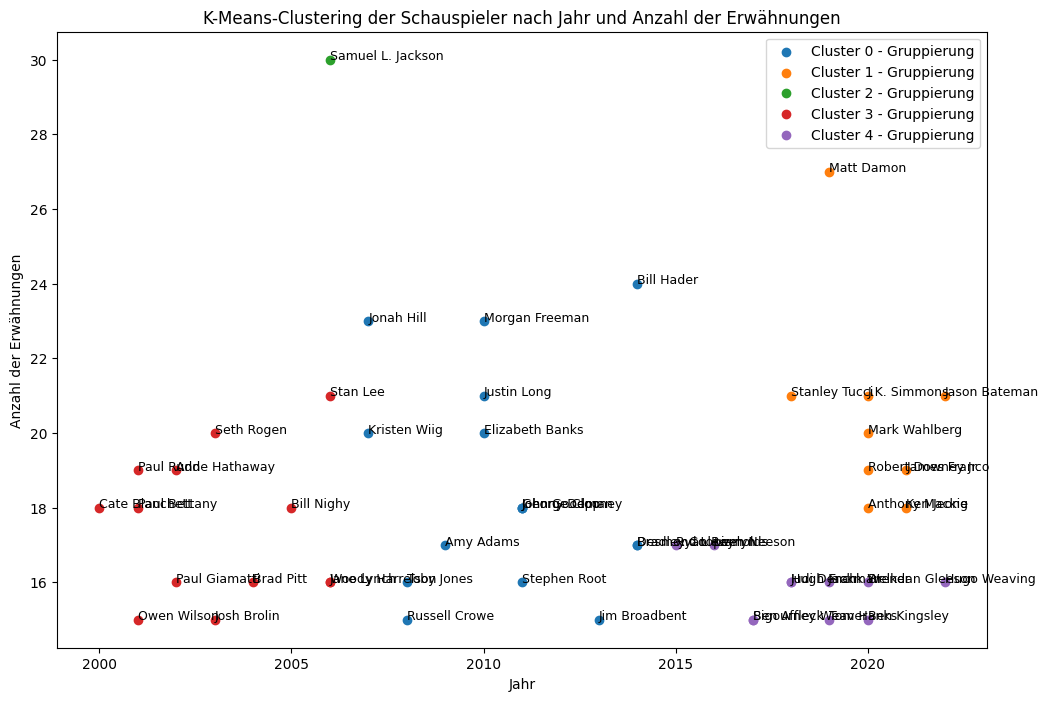

In [25]:
# cast Spalte und zähle Schauspielers
actor_counter = Counter()
for cast in combined_df['cast']:
    cast_list = ast.literal_eval(cast)
    for actor in cast_list:
        actor_counter[actor['name']] += 1

# Top 50 Schauspieler erwähnungen
top_actors = actor_counter.most_common(50)

# DataFrame Top Schauspieler
actors, counts = zip(*top_actors)
actor_df = pd.DataFrame({'actor': actors, 'count': counts})

# Generiere zufällige Jahre für die Filme (da die Jahresinformationen in der Credits-Datei nicht verfügbar sind)
np.random.seed(42)
years = np.random.randint(2000, 2023, size=len(actor_df))
actor_df['year'] = years

#K-Means Clustering durch
kmeans = KMeans(n_clusters=5, random_state=42)
actor_df['cluster'] = kmeans.fit_predict(actor_df[['count', 'year']])

# Zeichne die Cluster mit angepassten Beschriftungen
plt.figure(figsize=(12, 8))
for cluster in range(5):
    clustered_data = actor_df[actor_df['cluster'] == cluster]
    plt.scatter(clustered_data['year'], clustered_data['count'], label=f'Cluster {cluster} - Gruppierung')
    for i in range(len(clustered_data)):
        plt.text(clustered_data['year'].values[i], clustered_data['count'].values[i], clustered_data['actor'].values[i], fontsize=9)

plt.xlabel('Jahr')
plt.ylabel('Anzahl der Erwähnungen')
plt.title('K-Means-Clustering der Schauspieler nach Jahr und Anzahl der Erwähnungen')
plt.legend()
plt.show()



Die 5 Cluster im gezeigten Scatterplot repräsentieren verschiedene Gruppierungen von Schauspielern basierend auf ihrer Präsenz in Filmen (Anzahl der Erwähnungen) und den Jahren, in denen diese Filme zufällig generiert wurden. Da die Jahresinformationen in der Credits-Datei nicht verfügbar waren, wurden die Jahre zufällig zugewiesen, um den Clustering-Algorithmus zu ermöglichen.

Interpretation der Cluster:

Cluster mit hoher Anzahl an Erwähnungen und breiter Verteilung über die Jahre: Schauspieler in diesen Clustern sind wahrscheinlich bekannte und etablierte Stars, die in vielen Filmen über einen längeren Zeitraum mitgespielt haben.
Cluster mit niedriger Anzahl an Erwähnungen und konzentrierter Verteilung in bestimmten Jahren: Diese Cluster könnten Schauspieler enthalten, die in wenigen erfolgreichen Filmen innerhalb eines kürzeren Zeitraums aufgetreten sind oder Schauspieler, die in einer bestimmten Ära besonders präsent waren.
Cluster mit mittlerer Anzahl an Erwähnungen: Diese Cluster könnten Schauspieler umfassen, die eine solide Karriere haben, aber nicht die gleiche Bekanntheit wie die Top-Stars erreicht haben.
Es ist wichtig zu beachten, dass die zufällige Generierung der Jahre die Interpretation der Cluster beeinflusst. Die Cluster zeigen daher eher die Gruppierung nach der Anzahl der Erwähnungen als nach den tatsächlichen Jahren der Filme.

Zusammenfassend: Die 5 Cluster zeigen verschiedene Kategorien von Schauspielern basierend auf ihrer Filmpräsenz und den zufällig generierten Jahren. Die Interpretation der Cluster sollte die zufällige Natur der Jahresinformationen berücksichtigen.

<H1>Daten Zeitraum</H1>

In [26]:
# Zeitraum des Datensatz
combined_df['release_date'] = pd.to_datetime(combined_df['release_date'], errors='coerce')
date_range = combined_df['release_date'].agg([min, max])
date_range


C:\Users\zekej\AppData\Local\Temp\ipykernel_24484\3475950959.py:3: FutureWarning: The provided callable <built-in function min> is currently using Series.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  date_range = combined_df['release_date'].agg([min, max])
C:\Users\zekej\AppData\Local\Temp\ipykernel_24484\3475950959.py:3: FutureWarning: The provided callable <built-in function max> is currently using Series.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  date_range = combined_df['release_date'].agg([min, max])


min   1937-12-20
max   2017-02-03
Name: release_date, dtype: datetime64[ns]

<H1>Schauspieler</H1>

In [27]:
# Veröffentlichungsjahr 
combined_df['release_year'] = pd.to_datetime(combined_df['release_date'], errors='coerce').dt.year

# Schauspieler aus der cast Spalte
def extract_actors(cast_column):
    try:
        
        cast_list = ast.literal_eval(cast_column)
        return [actor['name'] for actor in cast_list if 'name' in actor]
    except (ValueError, SyntaxError):
        return []

# Anwenden der Funktion auf die 'cast'-Spalte
combined_df['actors'] = combined_df['cast'].apply(extract_actors)

# Gruppiere die Daten nach Jahrzehnten
combined_df['decade'] = (combined_df['release_year'] // 10) * 10

# Schauspieler pro Jahrzehnt sammeln
decade_actors = combined_df.groupby('decade')['actors'].sum().to_dict()

# Top Schauspieler pro Jahrzehnt
top_actors_by_decade = {decade: Counter(actors).most_common(10) for decade, actors in decade_actors.items() if not pd.isna(decade)}

top_actors_by_decade


{1930: [('Judy Garland', 1),
  ('Frank Morgan', 1),
  ('Ray Bolger', 1),
  ('Bert Lahr', 1),
  ('Jack Haley', 1),
  ('Billie Burke', 1),
  ('Margaret Hamilton', 1),
  ('Charley Grapewin', 1),
  ('Clara Blandick', 1),
  ('The Singer Midgets', 1)],
 1940: [('Deems Taylor', 1),
  ('Walt Disney', 1),
  ('Julietta Novis', 1),
  ('Leopold Stokowski', 1),
  ('Donnie Dunagan', 1),
  ('Peter Behn', 1),
  ('Stan Alexander', 1),
  ('Cammie King', 1),
  ('Will Wright', 1),
  ('Hardie Albright', 1)],
 1960: [('Bernard Lee', 6),
  ('Lois Maxwell', 6),
  ('Sean Connery', 5),
  ('Desmond Llewelyn', 5),
  ('Burt Kwouk', 2),
  ('Martine Beswick', 2),
  ('Nadja Regin', 2),
  ('Richard Vernon', 2),
  ('Eunice Gayson', 2),
  ('Anthony Dawson', 2)],
 1970: [('Bernard Lee', 5),
  ('Lois Maxwell', 5),
  ('Roger Moore', 4),
  ('Desmond Llewelyn', 4),
  ('Marlon Brando', 2),
  ('Robert Duvall', 2),
  ('Harrison Ford', 2),
  ('Richard Kiel', 2),
  ('Geoffrey Keen', 2),
  ('Walter Gotell', 2)],
 1980: [('Harrison

<H1>Schauspieler nach Jahren</H1>

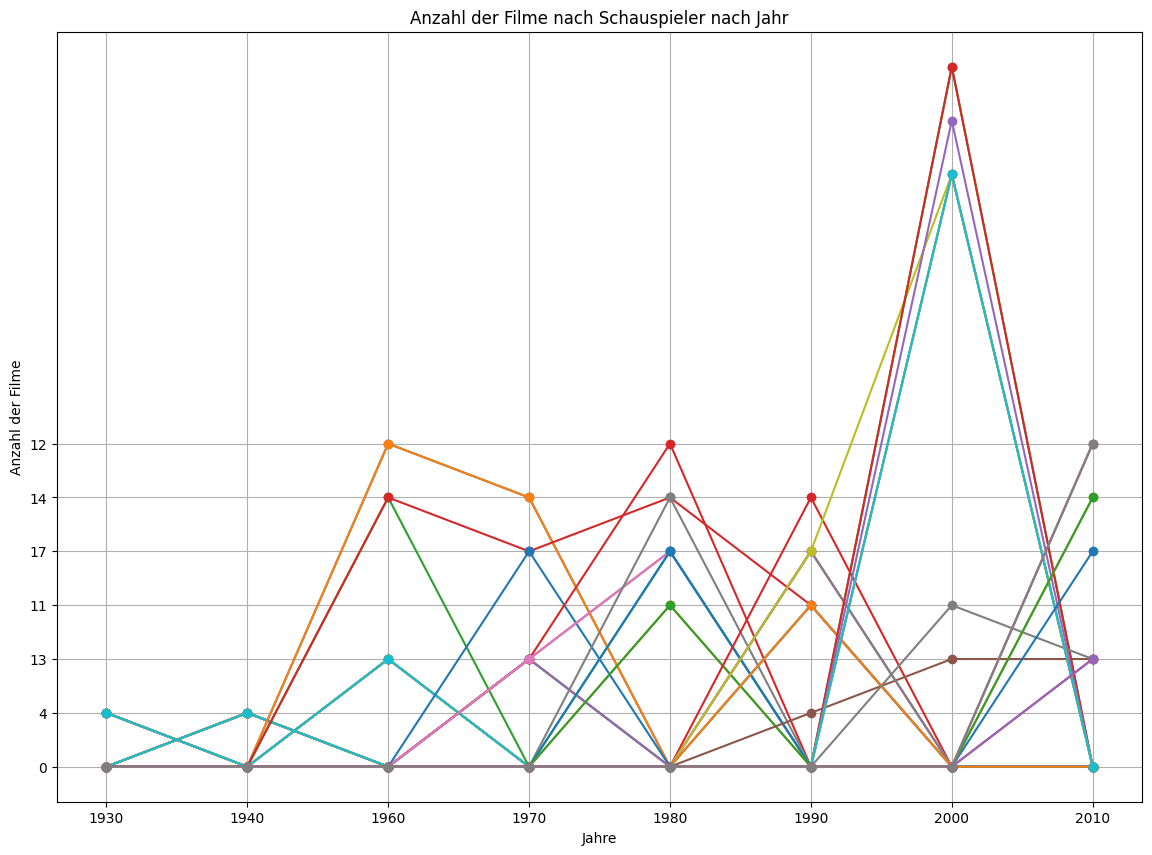

In [28]:
# Vorhandene Daten
data = {
    1930: [('Judy Garland', 1), ('Frank Morgan', 1), ('Ray Bolger', 1), ('Bert Lahr', 1), ('Jack Haley', 1), ('Billie Burke', 1), ('Margaret Hamilton', 1), ('Charley Grapewin', 1), ('Clara Blandick', 1), ('The Singer Midgets', 1)],
    1940: [('Deems Taylor', 1), ('Walt Disney', 1), ('Julietta Novis', 1), ('Leopold Stokowski', 1), ('Donnie Dunagan', 1), ('Peter Behn', 1), ('Stan Alexander', 1), ('Cammie King', 1), ('Will Wright', 1), ('Hardie Albright', 1)],
    1960: [('Bernard Lee', 6), ('Lois Maxwell', 6), ('Sean Connery', 5), ('Desmond Llewelyn', 5), ('Burt Kwouk', 2), ('Martine Beswick', 2), ('Nadja Regin', 2), ('Richard Vernon', 2), ('Eunice Gayson', 2), ('Anthony Dawson', 2)],
    1970: [('Bernard Lee', 5), ('Lois Maxwell', 5), ('Roger Moore', 4), ('Desmond Llewelyn', 4), ('Marlon Brando', 2), ('Robert Duvall', 2), ('Harrison Ford', 2), ('Richard Kiel', 2), ('Geoffrey Keen', 2), ('Walter Gotell', 2)],
    1980: [('Harrison Ford', 6), ('Desmond Llewelyn', 5), ('George Buck Flower', 5), ('Pat Roach', 4), ('Robert Brown', 4), ('Geoffrey Keen', 4), ('Walter Gotell', 4), ('Jeremy Bulloch', 4), ('John Rhys-Davies', 3), ('Julian Glover', 3)],
    1990: [('Danny DeVito', 5), ('Pierce Brosnan', 4), ('Samuel L. Jackson', 4), ('Phil Proctor', 4), ('Kevin Spacey', 4), ('Matt Damon', 4), ('Desmond Llewelyn', 3), ('Samantha Bond', 3), ('Judi Dench', 3), ('Natalie Portman', 3)],
    2000: [('Morgan Freeman', 13), ('Samuel L. Jackson', 13), ('Jason Bateman', 13), ('J.K. Simmons', 12), ('Bill Nighy', 11), ('Robert Downey Jr.', 11), ('Bill Hader', 11),
           ('Matt Damon',11),
           ("George Clooney",11),
           ("Denis O'Hare",11)],
    '2010': [('Stan Lee',
              '17'),
             ("Anthony Mackie",
              '14'),
             ("Jonah Hill",
              '14'),
             ("Samuel L. Jackson",
              '13'),
             ("Bill Hader",
              '13'),
             ("Ken Jeong",
              '13'),
             ("Kristen Wiig",
              '13'),
             ("Anne Hathaway",
              '12'),
             ("Johnny Depp",
              '12'),
             ("Mark Wahlberg",
              '12')]
}

# Festlegen bestimmen
years = list(data.keys())
actors = {}
for year in years:
    for actor, count in data[year]:
        if actor not in actors:
            actors[actor] = [0] * len(years)
        actors[actor][years.index(year)] = count

# Festlegen
fig, ax = plt.subplots(figsize=(14,10))

for actor, counts in actors.items():
    ax.plot(years, counts, marker='o')

ax.set_xlabel('Jahre')
ax.set_ylabel('Anzahl der Filme')
ax.set_title('Anzahl der Filme nach Schauspieler nach Jahr')
plt.grid(True)
plt.show()


In [ ]:
# Vorhandene Daten
data = {
    1930: [('Judy Garland', 1), ('Frank Morgan', 1), ('Ray Bolger', 1), ('Bert Lahr', 1), ('Jack Haley', 1), ('Billie Burke', 1), ('Margaret Hamilton', 1), ('Charley Grapewin', 1), ('Clara Blandick', 1), ('The Singer Midgets', 1)],
    1940: [('Deems Taylor', 1), ('Walt Disney', 1), ('Julietta Novis', 1), ('Leopold Stokowski', 1), ('Donnie Dunagan', 1), ('Peter Behn', 1), ('Stan Alexander', 1), ('Cammie King', 1), ('Will Wright', 1), ('Hardie Albright', 1)],
    1960: [('Bernard Lee', 6), ('Lois Maxwell', 6), ('Sean Connery', 5), ('Desmond Llewelyn', 5), ('Burt Kwouk', 2), ('Martine Beswick', 2), ('Nadja Regin', 2), ('Richard Vernon', 2), ('Eunice Gayson', 2), ('Anthony Dawson', 2)],
    1970: [('Bernard Lee', 5), ('Lois Maxwell', 5), ('Roger Moore', 4), ('Desmond Llewelyn', 4), ('Marlon Brando', 2), ('Robert Duvall', 2), ('Harrison Ford', 2), ('Richard Kiel', 2), ('Geoffrey Keen', 2), ('Walter Gotell', 2)],
    1980: [('Harrison Ford', 6), ('Desmond Llewelyn', 5), ('George Buck Flower', 5), ('Pat Roach', 4), ('Robert Brown', 4), ('Geoffrey Keen', 4), ('Walter Gotell', 4), ('Jeremy Bulloch', 4), ('John Rhys-Davies', 3), ('Julian Glover', 3)],
    1990: [('Danny DeVito', 5), ('Pierce Brosnan', 4), ('Samuel L. Jackson', 4), ('Phil Proctor', 4), ('Kevin Spacey', 4), ('Matt Damon', 4), ('Desmond Llewelyn', 3),
           ("Samantha Bond",3),
           ("Judi Dench",3),
           ("Natalie Portman",3)],
    '2000': [('Morgan Freeman',
              '13'),
             ("Samuel L. Jackson",
              '13'),
             ("Jason Bateman",
              '13'),
             ("J.K. Simmons",
              '12'),
             ("Bill Nighy",
              '11'),
             ("Robert Downey Jr.",
              '11'),
             ("Bill Hader",
              '11'),
             ("Matt Damon",
              '11'),
             ("George Clooney",
              '11'),
             ("Denis O'Hare",
              '11')],
    '2010': [('Stan Lee',
              '17'),
             ("Anthony Mackie",
              '14'),
             ("Jonah Hill",
              '14'),
             ("Samuel L. Jackson",
              '13'),
             ("Bill Hader",
              '13'),
             ("Ken Jeong",
              '13'),
             ("Kristen Wiig",
              '13'),
             ("Anne Hathaway",
              '12'),
             ("Johnny Depp",
              '12'),
             ("Mark Wahlberg",
              '12')]
}

# Schaupsieler zählen
actor_counts = Counter()
for year in data:
    for actor, count in data[year]:
        actor_counts[actor] += int(count)

# Top Ten Schauspieler
top_actors = actor_counts.most_common(10)

# Festlegen bestimmen
actors, counts = zip(*top_actors)

# Festlegen
fig, ax = plt.subplots(figsize=(10,6))
ax.barh(actors, counts, color='skyblue')
ax.set_xlabel('Anzahl der Filme')
ax.set_ylabel('Schauspieler')
ax.set_title('Top Ten Schauspieler nach anzahl der Filme über alle Dekaden')
plt.gca().invert_yaxis()
plt.show()



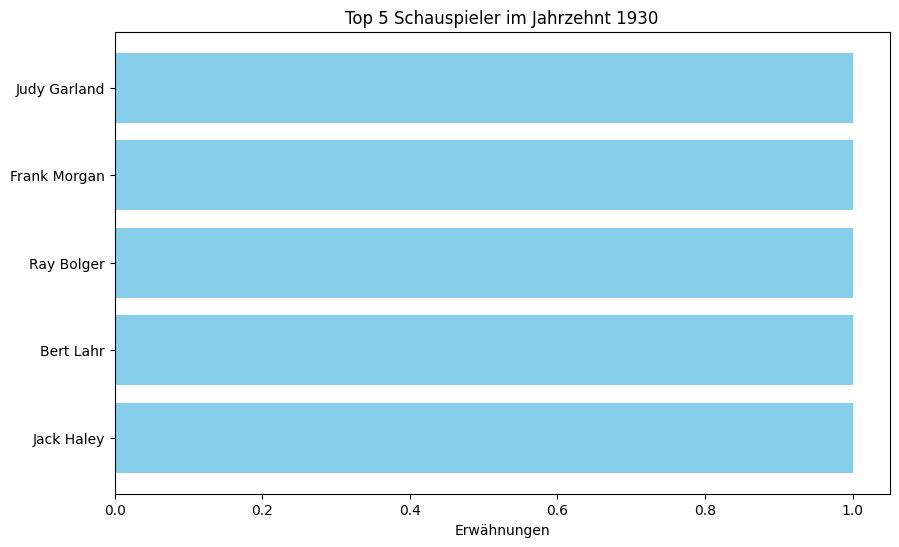

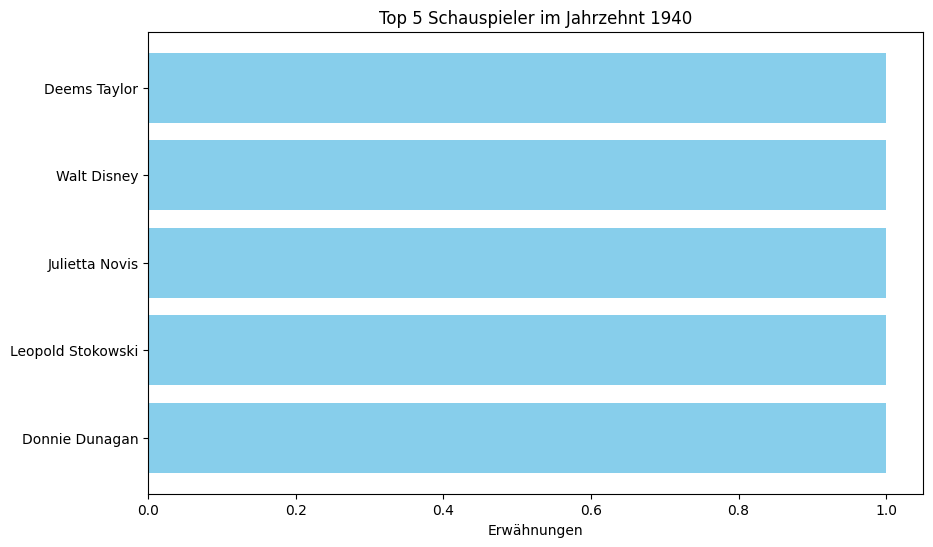

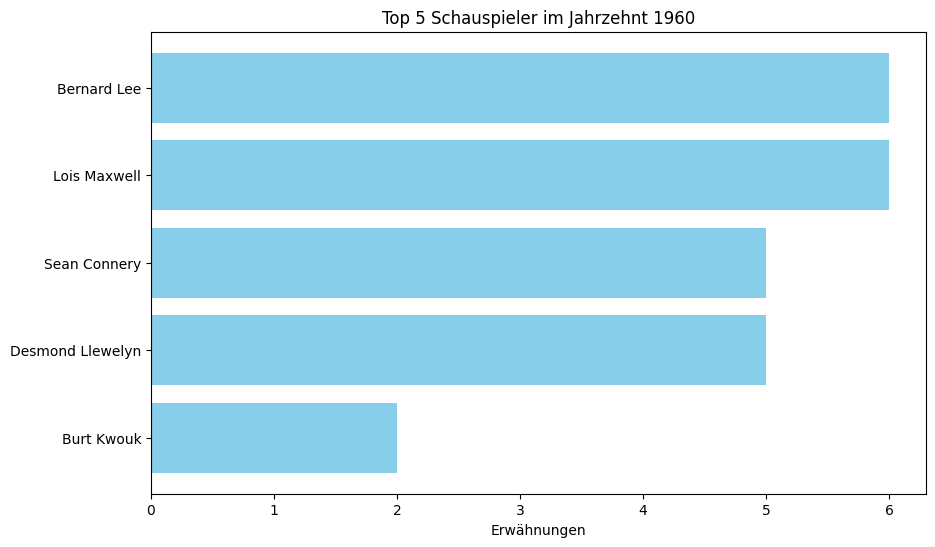

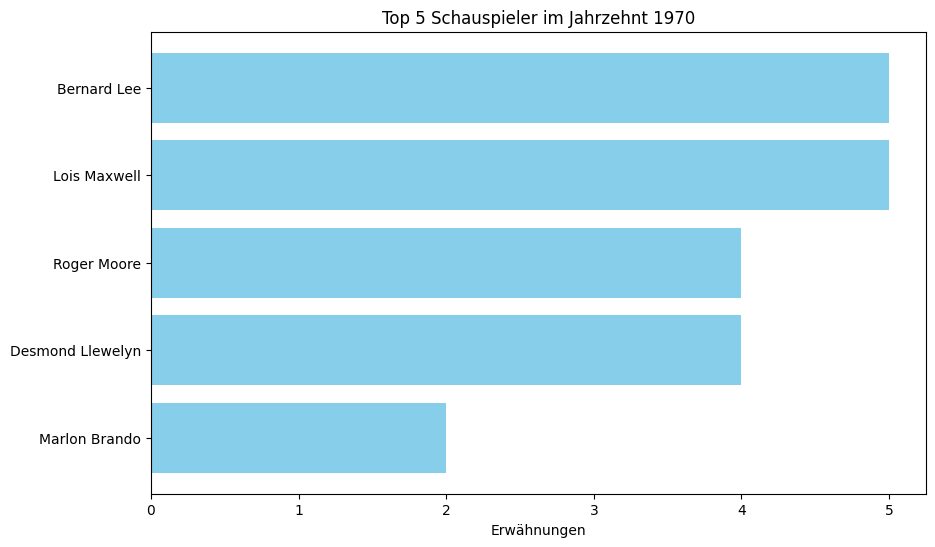

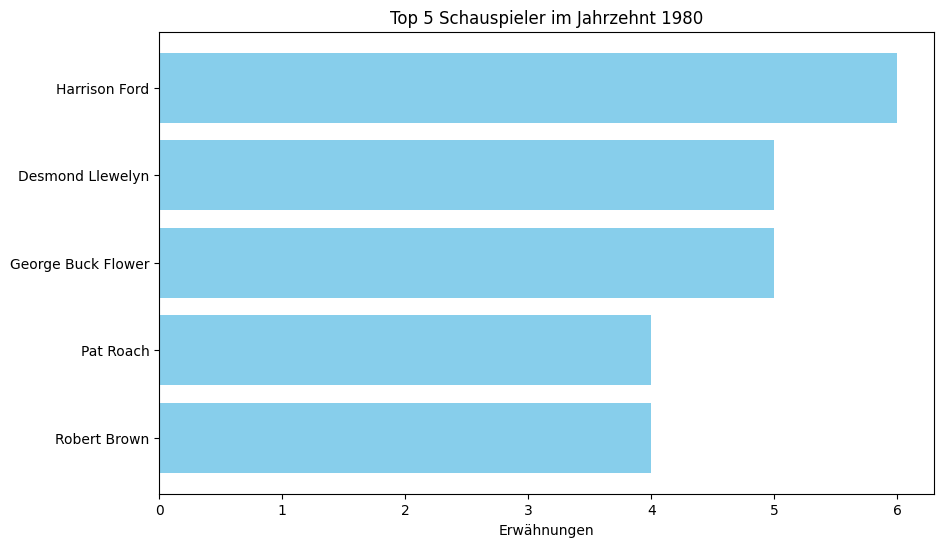

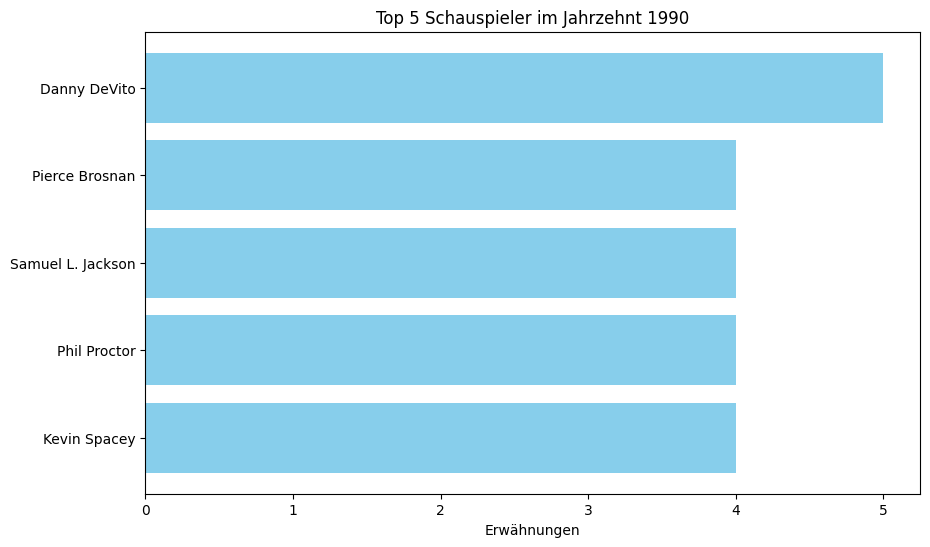

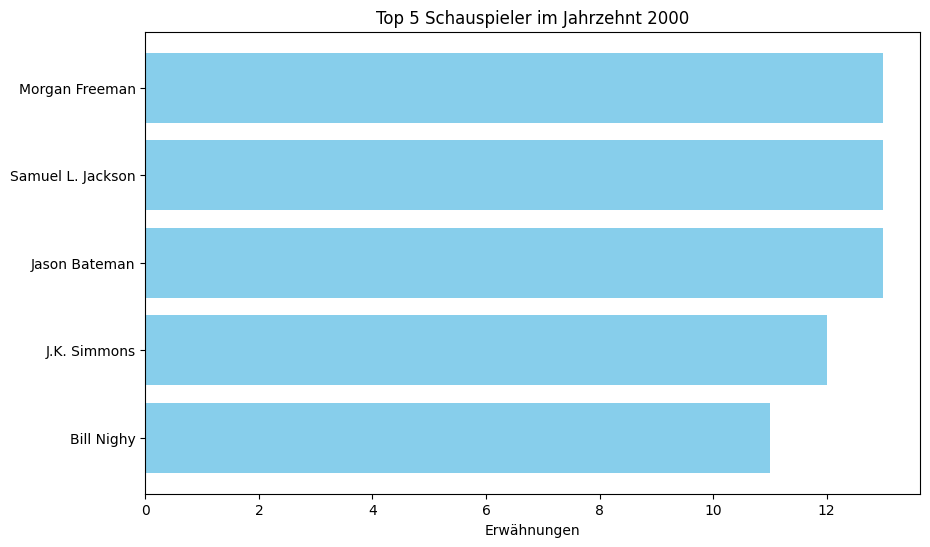

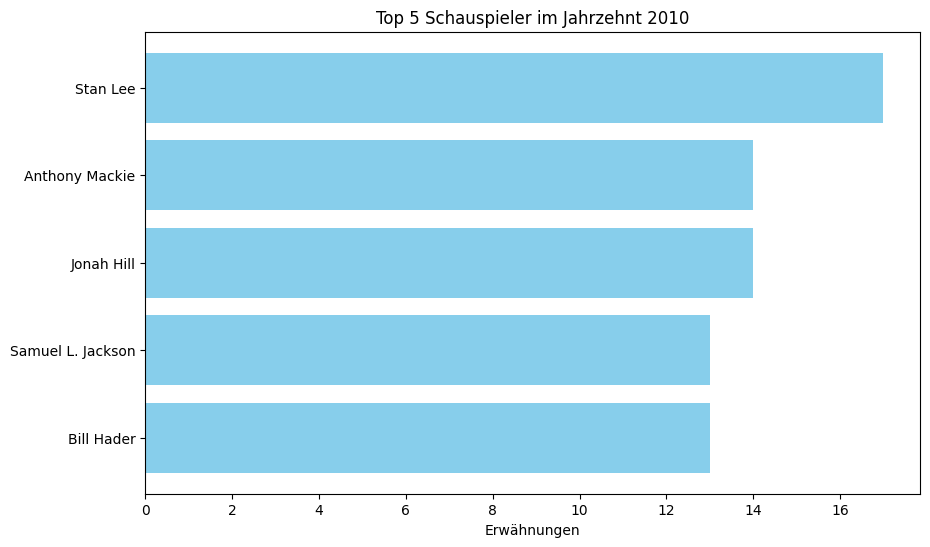

In [29]:
# CSV Laden
combined_df = pd.read_csv('combined_tmdb_movies_credits.csv')

# Veröffentlichungsjahr
combined_df['release_year'] = pd.to_datetime(combined_df['release_date'], errors='coerce').dt.year

# Schauspieler aus der 'cast'-Spalte
def extract_actors(cast_column):
    try:
        cast_list = ast.literal_eval(cast_column)
        return [actor['name'] for actor in cast_list if 'name' in actor]
    except (ValueError, SyntaxError):
        return []

combined_df['actors'] = combined_df['cast'].apply(extract_actors)

# Gruppiere nach Jahrzehnt
combined_df['decade'] = (combined_df['release_year'] // 10) * 10
decade_actors = combined_df.groupby('decade')['actors'].sum().to_dict()

# Top 5 Schauspieler pro Jahrzehnt
top_actors_by_decade = {decade: Counter(actors).most_common(5) for decade, actors in decade_actors.items() if not pd.isna(decade)}

# Balkendiagramm jedes Jahrzehnt
for decade, top_actors in top_actors_by_decade.items():
    names = [actor[0] for actor in top_actors]
    counts = [actor[1] for actor in top_actors]

    plt.figure(figsize=(10, 6))
    plt.barh(names, counts, color='skyblue')
    plt.xlabel('Erwähnungen')
    plt.title(f'Top 5 Schauspieler im Jahrzehnt {int(decade)}')
    plt.gca().invert_yaxis()
    plt.show()


<H1>Umsätze</H1>

In [30]:
# Umsatz berechnen 
combined_df['profit'] = combined_df['revenue'] - combined_df['budget']

# Filme identifizieren
lowest_budget_high_profit = combined_df[combined_df['budget'] > 0].nsmallest(5, 'budget').nlargest(5, 'profit', 'all')[['original_title', 'budget', 'revenue', 'profit']]

lowest_budget_high_profit


,original_title,budget,revenue,profit
1447,Paranormal Activity,15000,193355800,193340800
1470,Weekend,8000,469947,461947
1491,Primer,7000,424760,417760
1490,Tin Can Man,13,0,-13
528,滿城盡帶黃金甲,110,0,-110


C:\Users\zekej\AppData\Local\Temp\ipykernel_24484\4046221964.py:38: UserWarning: Glyph 28415 (\N{CJK UNIFIED IDEOGRAPH-6EFF}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\zekej\AppData\Local\Temp\ipykernel_24484\4046221964.py:38: UserWarning: Glyph 22478 (\N{CJK UNIFIED IDEOGRAPH-57CE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\zekej\AppData\Local\Temp\ipykernel_24484\4046221964.py:38: UserWarning: Glyph 30433 (\N{CJK UNIFIED IDEOGRAPH-76E1}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\zekej\AppData\Local\Temp\ipykernel_24484\4046221964.py:38: UserWarning: Glyph 24118 (\N{CJK UNIFIED IDEOGRAPH-5E36}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\zekej\AppData\Local\Temp\ipykernel_24484\4046221964.py:38: UserWarning: Glyph 40643 (\N{CJK UNIFIED IDEOGRAPH-9EC3}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\zekej\AppData\Local\Temp\ipykernel_24484\4046221964.py:38: UserWarning: Glyph 37329 (\

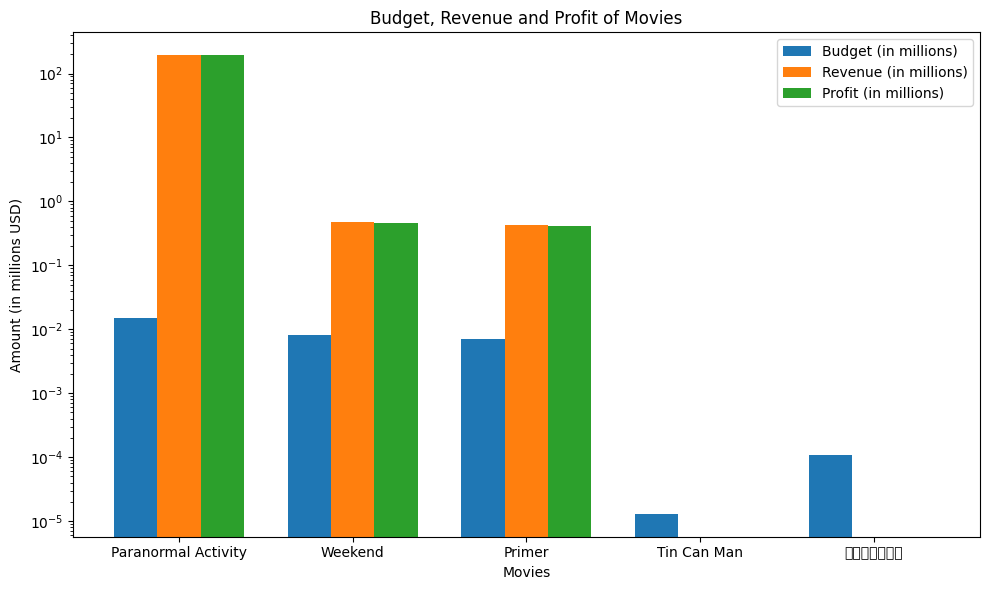

In [31]:
# Vorhande Daten
data = [
    ("Paranormal Activity", 15000, 193355800, 193340800),
    ("Weekend", 8000, 469947, 461947),
    ("Primer", 7000, 424760, 417760),
    ("Tin Can Man", 13, 0, -13),
    ("滿城盡帶黃金甲", 110, 0, -110)
]

# Festlegen vorbereiten
titles = [item[0] for item in data]
budgets = [item[1] for item in data]
revenues = [item[2] for item in data]
profits = [item[3] for item in data]

# Wert festlegen
adjusted_budgets = [budget / 1e6 for budget in budgets]
adjusted_revenues = [revenue / 1e6 for revenue in revenues]
adjusted_profits = [profit / 1e6 for profit in profits]

# Festlegen
fig, ax = plt.subplots(figsize=(10,6))

bar_width = 0.25
index = np.arange(len(titles))

bar1 = plt.bar(index, adjusted_budgets, bar_width, label='Budget (in millions)')
bar2 = plt.bar(index + bar_width, adjusted_revenues, bar_width, label='Revenue (in millions)')
bar3 = plt.bar(index + bar_width * 2, adjusted_profits, bar_width, label='Profit (in millions)')

plt.xlabel('Movies')
plt.ylabel('Amount (in millions USD)')
plt.title('Budget, Revenue and Profit of Movies')
plt.xticks(index + bar_width, titles)
plt.yscale('log')
plt.legend()

plt.tight_layout()
plt.show()





In [32]:
# siehe oben 
highest_budget_low_revenue = combined_df.nlargest(5, 'budget').nsmallest(5, 'revenue', 'all')[['original_title', 'budget', 'revenue', 'profit']]

highest_budget_low_revenue


,original_title,budget,revenue,profit
4,John Carter,260000000,284139100,24139100
6,Tangled,260000000,591794936,331794936
1,Pirates of the Caribbean: At World's End,300000000,961000000,661000000
15,Pirates of the Caribbean: On Stranger Tides,380000000,1045713802,665713802
7,Avengers: Age of Ultron,280000000,1405403694,1125403694


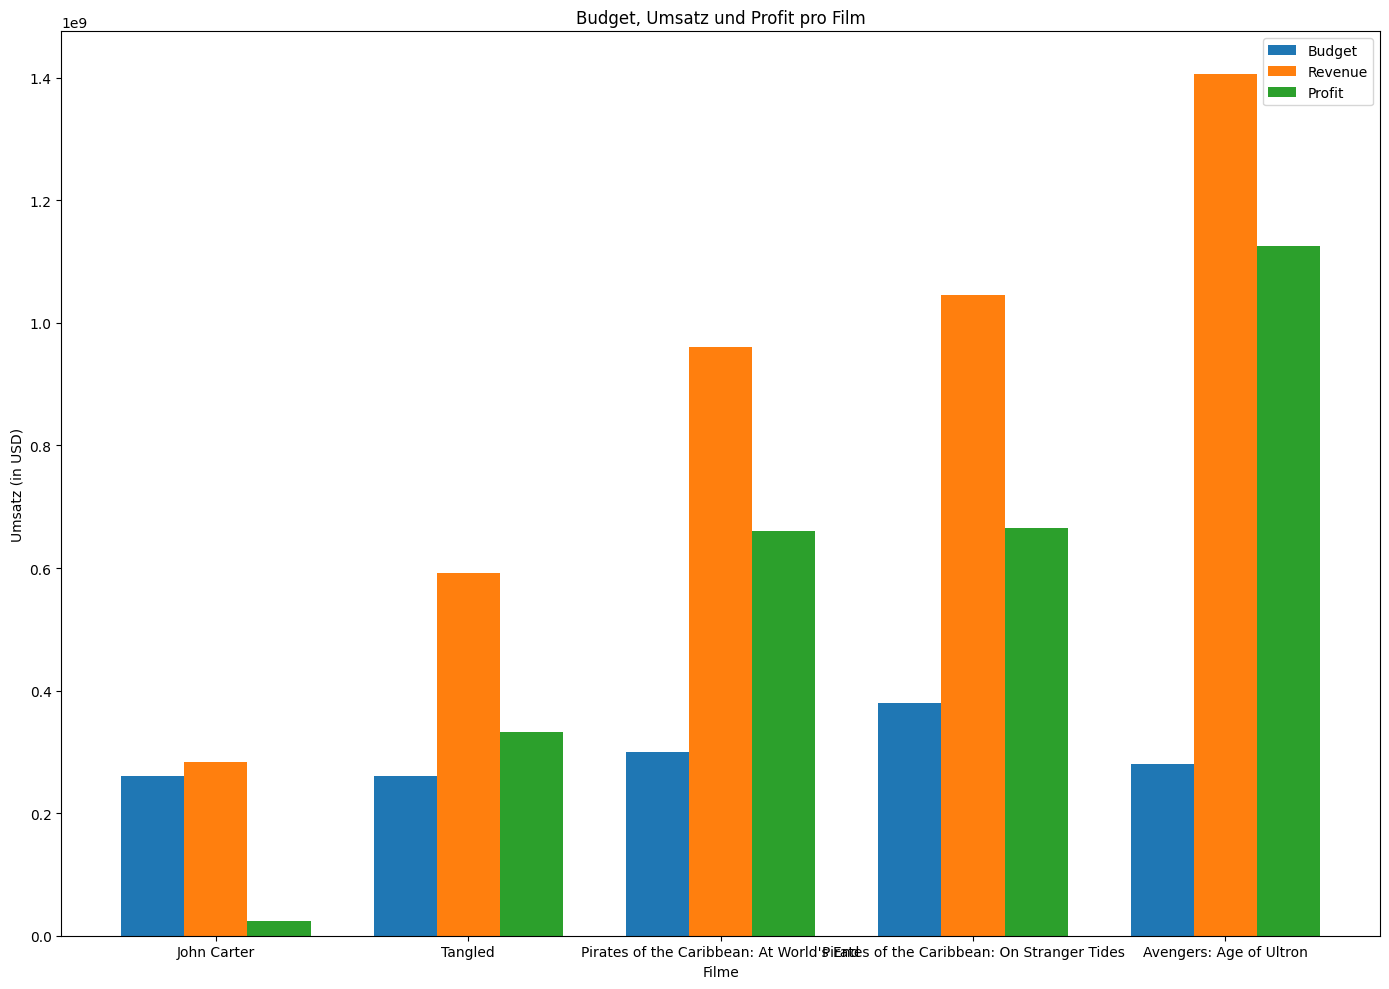

In [33]:
# Vorhandene Daten
data = [
    ("John Carter", 260000000, 284139100, 24139100),
    ("Tangled", 260000000, 591794936, 331794936),
    ("Pirates of the Caribbean: At World's End", 300000000, 961000000, 661000000),
    ("Pirates of the Caribbean: On Stranger Tides", 380000000, 1045713802, 665713802),
    ("Avengers: Age of Ultron", 280000000, 1405403694, 1125403694)
]

# Festlegen vorbereiten
titles = [item[0] for item in data]
budgets = [item[1] for item in data]
revenues = [item[2] for item in data]
profits = [item[3] for item in data]

# Festlegen
fig, ax = plt.subplots(figsize=(14,10))

bar_width = 0.25
index = range(len(titles))

bar1 = plt.bar(index, budgets, bar_width, label='Budget')
bar2 = plt.bar([i + bar_width for i in index], revenues, bar_width, label='Revenue')
bar3 = plt.bar([i + bar_width * 2 for i in index], profits, bar_width, label='Profit')

plt.xlabel('Filme')
plt.ylabel('Umsatz (in USD)')
plt.title('Budget, Umsatz und Profit pro Film')
plt.xticks([i + bar_width for i in index], titles)
plt.legend()

plt.tight_layout()
plt.show()



<H1>Genres</H1>

In [34]:
# Umwandeln in dekaden
combined_df['release_date'] = pd.to_datetime(combined_df['release_date'], errors='coerce')

# Release Date Säubern
combined_df = combined_df.dropna(subset=['release_date'])

# Dekaden ziehen
combined_df['decade'] = (combined_df['release_date'].dt.year // 10) * 10

# Auf fehler prüfen um Genre einheitlich zu ziehen
def extract_genre_names(genre_str):
    try:
        genres = ast.literal_eval(genre_str)
        return [genre['name'] for genre in genres if 'name' in genre]
    except (ValueError, SyntaxError):
        return []

# Genre anwednen 
combined_df['genre_names'] = combined_df['genres'].apply(extract_genre_names)

# Top 5 Gene pro Dekade
decade_genre_counts = {}
for decade, group in combined_df.groupby('decade'):
    all_genres = [genre for genres in group['genre_names'] for genre in genres]
    top_genres = Counter(all_genres).most_common(5)
    decade_genre_counts[decade] = top_genres

# Print die top 5 Pro Dekade
decade_genre_counts


{1930: [('Family', 2), ('Fantasy', 2), ('Adventure', 1), ('Animation', 1)],
 1940: [('Animation', 2), ('Family', 2), ('Music', 1), ('Drama', 1)],
 1960: [('Action', 6),
  ('Thriller', 6),
  ('Adventure', 6),
  ('Western', 1),
  ('Comedy', 1)],
 1970: [('Thriller', 10),
  ('Action', 8),
  ('Adventure', 8),
  ('Drama', 5),
  ('Horror', 4)],
 1980: [('Adventure', 19),
  ('Action', 17),
  ('Science Fiction', 16),
  ('Thriller', 12),
  ('Comedy', 6)],
 1990: [('Drama', 41),
  ('Comedy', 25),
  ('Action', 21),
  ('Thriller', 20),
  ('Romance', 17)],
 2000: [('Drama', 280),
  ('Comedy', 216),
  ('Thriller', 160),
  ('Action', 158),
  ('Romance', 120)],
 2010: [('Drama', 299),
  ('Comedy', 249),
  ('Thriller', 211),
  ('Action', 207),
  ('Adventure', 155)]}

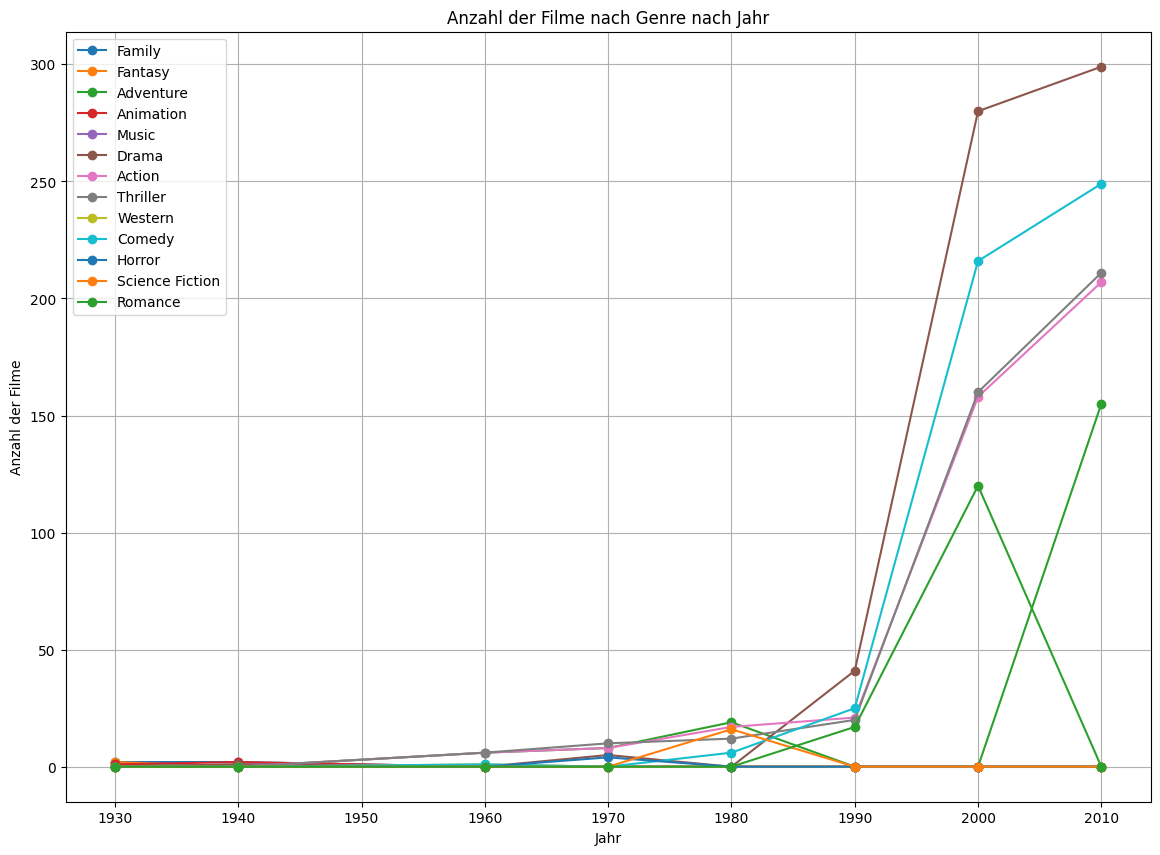

In [35]:
# Vorhandenen Daten
data = {
    1930: [('Family', 2), ('Fantasy', 2), ('Adventure', 1), ('Animation', 1)],
    1940: [('Animation', 2), ('Family', 2), ('Music', 1), ('Drama', 1)],
    1960: [('Action', 6), ('Thriller', 6), ('Adventure', 6), ('Western', 1), ('Comedy', 1)],
    1970: [('Thriller', 10), ('Action', 8), ('Adventure', 8), ('Drama', 5), ('Horror', 4)],
    1980: [('Adventure', 19), ('Action', 17), ('Science Fiction', 16), ('Thriller', 12), ('Comedy', 6)],
    1990: [('Drama', 41), ('Comedy', 25), ('Action', 21), ('Thriller', 20), ('Romance', 17)],
    2000: [('Drama', 280), ('Comedy', 216), ('Thriller', 160), ('Action', 158), ('Romance', 120)],
    2010: [('Drama', 299), ('Comedy', 249), ('Thriller', 211), ('Action', 207), ('Adventure', 155)]
}

# Daten vorbereiten
years = list(data.keys())
genres = {}
for year in years:
    for genre, count in data[year]:
        if genre not in genres:
            genres[genre] = [0] * len(years)
        genres[genre][years.index(year)] = count

# Festlegen
fig, ax = plt.subplots(figsize=(14,10))

for genre, counts in genres.items():
    ax.plot(years, counts, marker='o', label=genre)

ax.set_xlabel('Jahr')
ax.set_ylabel('Anzahl der Filme')
ax.set_title('Anzahl der Filme nach Genre nach Jahr')
ax.legend()
plt.grid(True)
plt.show()
